# Community Contribution: Plotting in Python 

### - Vinayak Bakshi (vb2424), Varun Aggarwal (va2344)


The document aims to compare the process of creating visualizations in ggplot v/s plotting in python. The following is a subset of the graphs discussed in class that were originally built in Python. The document aims to replicate those graphs using matplotlib.

### Importing Datasets

In [1]:
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd
import pydataset
import numpy as np
from matplotlib import animation
from scipy import stats
from sklearn import datasets
from IPython.core.display import display, HTML
import plotly as py
import plotly.graph_objs as go
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df['Species'] = iris.target
iris_df['Species'] = iris_df.Species.apply(lambda x: iris.target_names[x])

### Histogram 

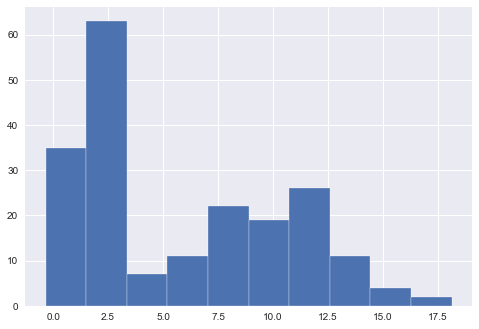

In [3]:
data = np.hstack([np.random.normal(loc=2, scale=1, size=100), np.random.normal(loc=10, scale=3, size=100)])
plt.hist(data, edgecolor='white')
plt.show()

### Cumulative Histogram

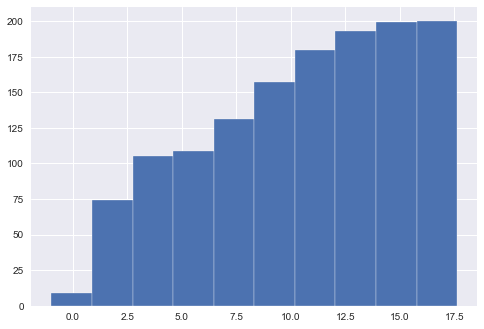

In [4]:
data = np.hstack([np.random.normal(loc=2, scale=1, size=100), np.random.normal(loc=10, scale=3, size=100)])
plt.hist(data, cumulative=True, edgecolor='white')
plt.show()

### Box Plot

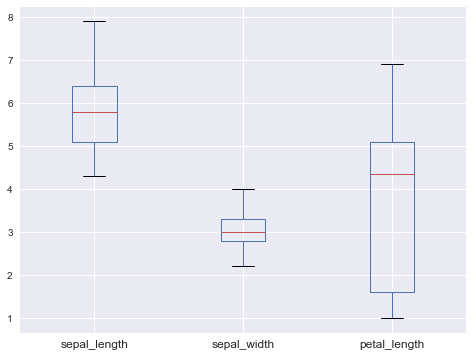

In [5]:
def box_plot(data,dim = (8,5)):
    plt.figure(figsize=dim)
    data.boxplot()
    plt.show()  

box_plot(iris_df.iloc[:,0:3],(8,6))

### Pie Chart

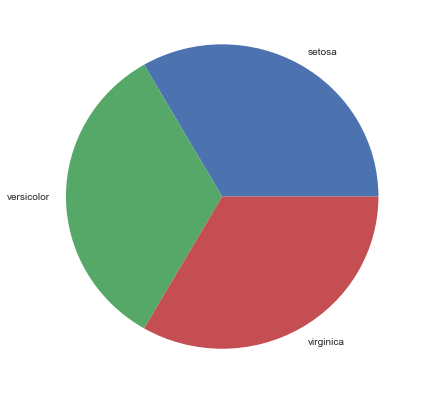

In [6]:
## Class Distribution in Iris
iris_df.groupby('Species')['Species'].count().plot.pie(figsize=(7,7))
plt.ylabel('')
plt.show()

### Strip Plots

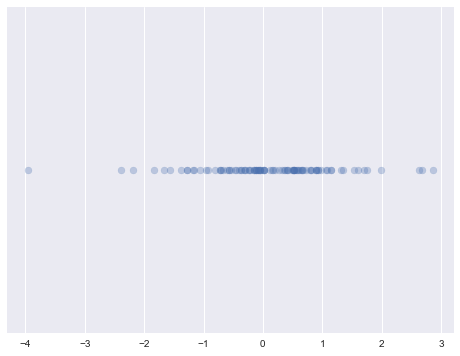

In [7]:
data = np.random.normal(size=100)
def strip_plot(data, size = (8,6)):
    plt.figure(figsize = size)
    plt.scatter(x=data, y=[1]*100, alpha=.3)
    plt.yticks([],[])
    plt.show()
    
strip_plot(data)

###  Rug plot 

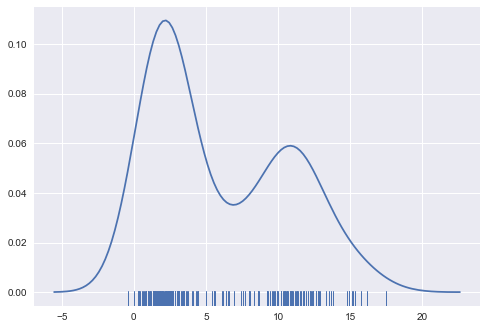

In [8]:
data = np.hstack([np.random.normal(loc=2, scale=1, size=100), np.random.normal(loc=10, scale=3, size=100)])
sns.distplot(data, hist=False, rug=True)
plt.show()

### Scatter Plot

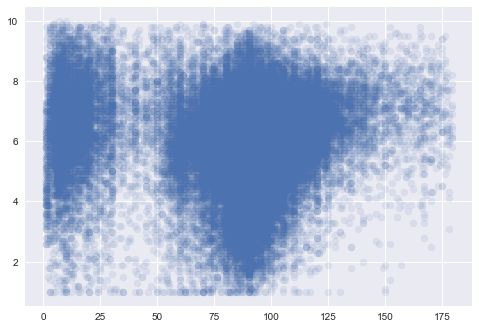

In [9]:
movies = pydataset.data('movies')
movies = movies[movies.length < 180]
plt.scatter(movies.length, movies.rating, alpha=.1)
plt.show()

### Scatter plot Matrix

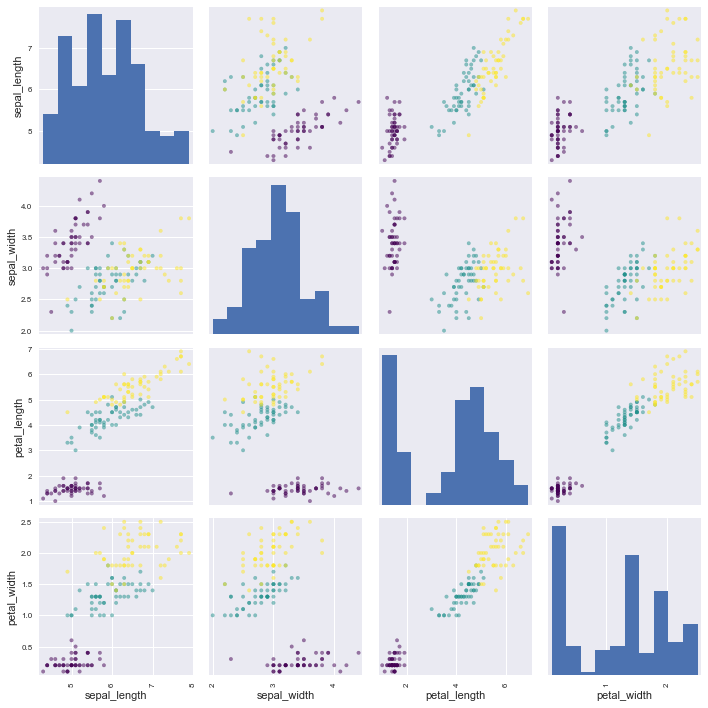

In [10]:
pd.scatter_matrix(iris_df,figsize=(10, 10), c=iris_df.Species.factorize()[0], cmap='viridis')
plt.tight_layout()
plt.show()

### Cleveland Dot Plot

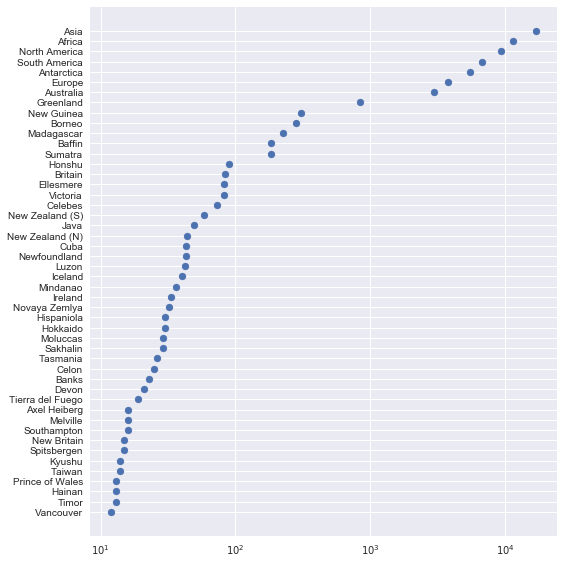

In [11]:
islands = pydataset.data('islands')
islands = islands.sort_values('x')
n = len(islands.x)
plt.figure(figsize=(8, 8))
plt.scatter(islands.x, range(n))
plt.yticks(range(n), islands.index.to_series())
plt.xscale('log')
plt.tight_layout()
plt.show()

### Hexbins

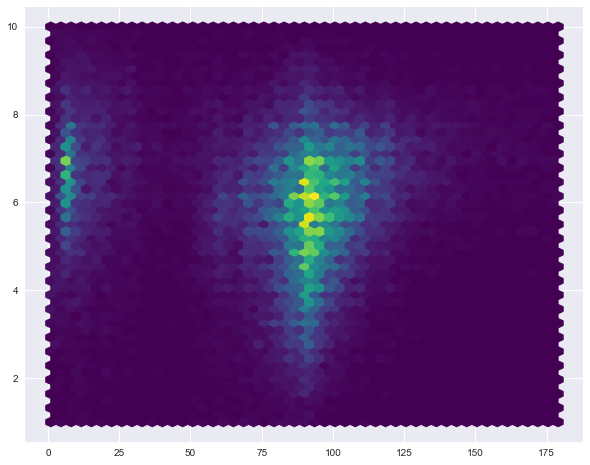

In [12]:
plt.figure(figsize=(10,8))
plt.hexbin(movies.length, movies.rating, gridsize=50, cmap='viridis')
plt.show()

### Mosaic Plot

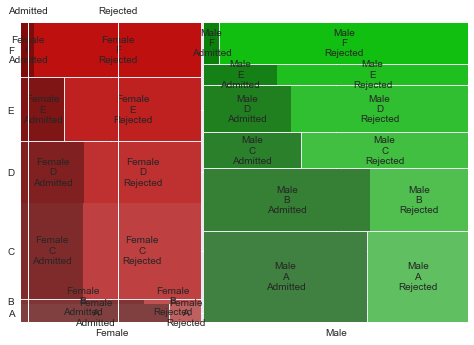

In [13]:
ucb = pydataset.data('UCBAdmissions')
plt.figure(figsize = (12,12))
mosaic(ucb.groupby(['Gender', 'Dept', 'Admit']).sum()['Freq'])
plt.show()

### Parallel Coordinate Plot

We can import a pandas wrapper for parallel coordinate plot called parallel_coordinates and use it for plotting pcps.
Source code: plotting.py#L494

In [14]:
from pandas.tools.plotting import parallel_coordinates

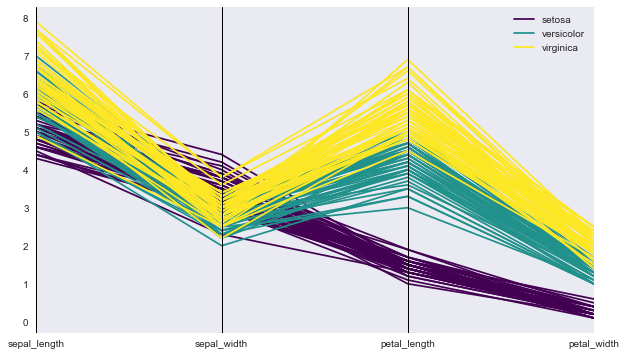

In [15]:
def pcp(data,Category,dim = (8.5)):
    plt.figure(figsize=dim)
    parallel_coordinates(data,Category, colormap='viridis')
    plt.show()   

pcp(iris_df,'Species',(10,6))

### Density Plot - 2D

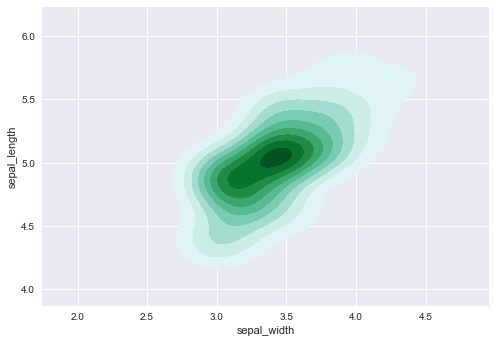

In [16]:
setosa = iris_df[iris_df.Species == 'setosa']

sns.kdeplot(setosa['sepal_width'], setosa['sepal_length'], shade=True, shade_lowest=False)
plt.show()

### Heat Map

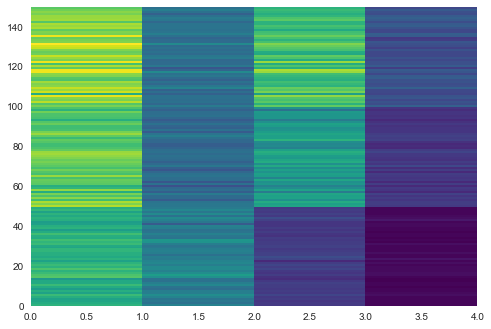

In [17]:
plt.pcolor(iris_df.iloc[:,:4].as_matrix(), cmap = 'viridis')
plt.show()

## Faceting

In [18]:
def facet_wrap(df, x, y, plot, faceting):
    grouped = df.groupby(faceting)
    i = 1
    n = len(grouped)
    a = int(n**.5 + 1)
    b = int(n**.5 + 1)
    plt.figure(figsize=(10, 10))
    for name, group in grouped:
        plt.subplot(a, b, i,alpha = 0.5)
        plt.title(name)
        plot(group[x], group[y])
        i += 1
    return plt.tight_layout()

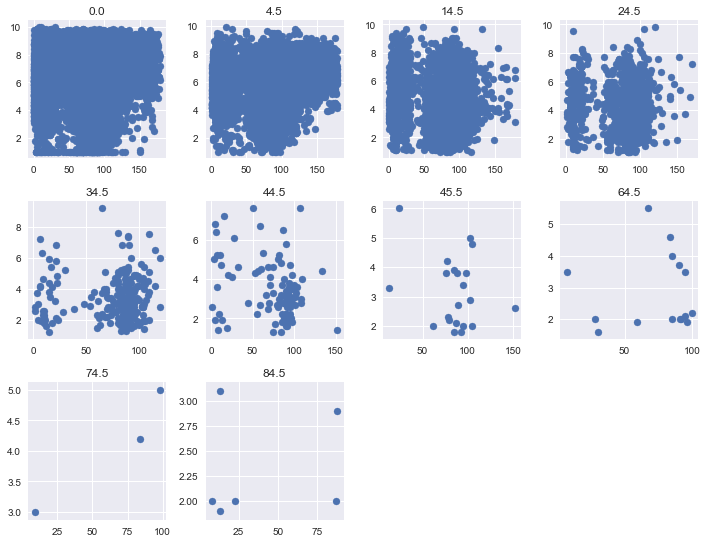

In [19]:
facet_wrap(movies, 'length', 'rating', plt.scatter, 'r2')